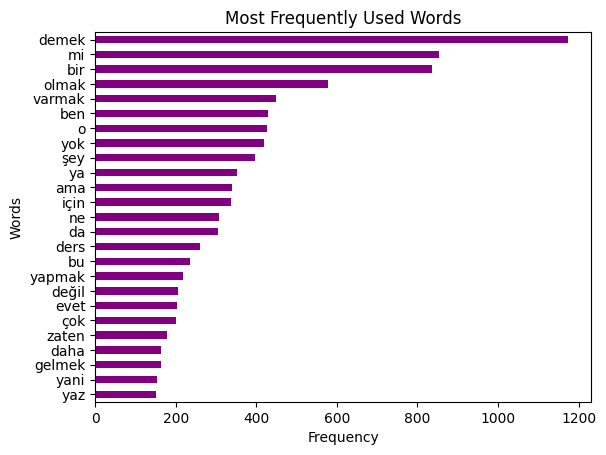

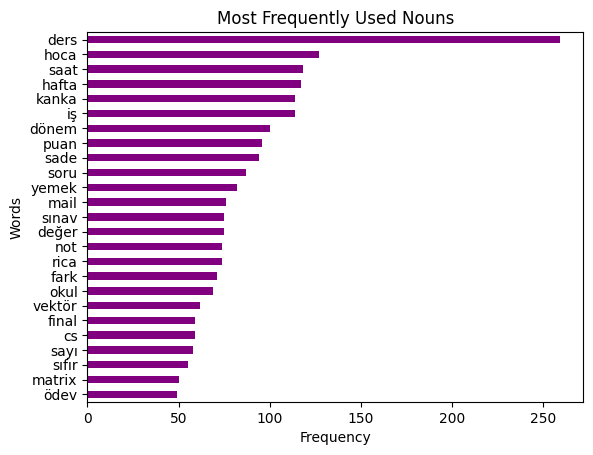

In [74]:
import operator
import matplotlib.pyplot as plt
import pandas as pd
import zeyrek

from zemberek import (
    TurkishSpellChecker,
    TurkishSentenceNormalizer,
    TurkishSentenceExtractor,
    TurkishMorphology,
    TurkishTokenizer
)

# Necessary initializations for lemmatization and normalization
morphology = TurkishMorphology.create_with_defaults()
normalizer = TurkishSentenceNormalizer(morphology)
analyzer = zeyrek.MorphAnalyzer()

# This is the path to a txt file in which each line contains the path to a WhatsApp chatlog in .txt format
file_path = '/Users/ahmetcoskun/Desktop/whatsapp_chat_paths.txt'  

# Add each path to a list
path_list = []
with open(file_path, 'r') as file:
    for line in file:
        path_list.append(line.strip())

wordDict = {} # Create the dictionary in which we will store the words and their counts

for chat_path in path_list: # For every chatlog
    with open(chat_path, 'r') as file: # Open the file
        for line in file:  # For every line in the file
            if (len(line) >= 35 and line[22:35] ==  "ahmet coşkun:") or (len(line) >= 36 and line[23:36] ==  "ahmet coşkun:"): #If the program is on a line where a text message I sent appears (the code is written keeping in mind the format of a WhatsApp chatlog .txt file)                              
                # This code block stores the text messages in the line in wordstring (keeping in mind the format of a WhatsApp chatlog)
                if line[20] == "]":
                    wordstring = line[36:]
                if line[21] == "]":
                    wordstring = line[37:]
                
                wordstring = wordstring.lower() # Turn the words into lowercase
                
                wordstring = normalizer.normalize(wordstring)   # Normalize the words
                
                wordsByAhmet = wordstring.split(' ')    # Tokenize the words
                
                for i in range(len(wordsByAhmet)):  # For each token
                    if len(wordsByAhmet[i]) > 0 :   # If it's not an empty string
                        if len(analyzer.lemmatize(wordsByAhmet[i])) > 0:    #If we can take the lemma of this word
                            wordsByAhmet[i] = analyzer.lemmatize(wordsByAhmet[i])[0][1][0]  # Change the word with its lemmatized version
                        
                        if wordsByAhmet[i] not in wordDict.keys():  # Add the word to the dictionary, update its count if already added                        
                            wordDict[wordsByAhmet[i]] = 1
                        else:
                            wordDict[wordsByAhmet[i]] += 1                


# Set options to display all rows and columns without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Sort the words by their counts in descending order
sorted_items = sorted(wordDict.items(), key=lambda x: x[1], reverse=True)[:25]

# Create a pandas DataFrame from the selected pairs
df = pd.DataFrame(sorted_items, columns=['Key', 'Value'])

# Sorting the DataFrame in reverse order based on values
df_sorted = df.sort_values(by='Value', ascending=True)

# Plotting a horizontal bar chart
df_sorted.plot(kind='barh', x='Key', y='Value', color='purple', legend=False)

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Frequently Used Words')

# Displaying the plot
plt.show()

# Now we do the same process but by considering non-noun words as stopwords

wordDictWithNounsOnly = wordDict.copy() 

# Delete each stopword from the new dictionary
with open('/Users/ahmetcoskun/Desktop/stopword_list.txt', 'r') as stopwordlist:
    for line in stopwordlist:
        stopword = line.strip()
        del wordDictWithNounsOnly[stopword]

# Sort the words by their counts in descending order
sorted_items_nouns_only = sorted(wordDictWithNounsOnly.items(), key=lambda x: x[1], reverse=True)[:25]

# Create a pandas DataFrame from the selected pairs
df_nouns_only = pd.DataFrame(sorted_items_nouns_only, columns=['Key', 'Value'])

# Sorting the DataFrame in reverse order based on values
df_sorted_nouns_only = df_nouns_only.sort_values(by='Value', ascending=True)

# Plotting a horizontal bar chart
df_sorted_nouns_only.plot(kind='barh', x='Key', y='Value', color='purple', legend=False)

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Frequently Used Nouns')

# Displaying the plot
plt.show()